In [2]:
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## ⚡ Step 5.1: XGBoost Model for Power Consumption Forecasting

In [3]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

## 📥 Load the cleaned dataset

In [4]:
df = pd.read_csv('../Datasets/cleaned_powerconsumption.csv', parse_dates=['Datetime'], index_col='Datetime')

## 🧠 Prepare features and target

In [ ]:
features = [
    'Temperature', 'Humidity', 'WindSpeed',
    'hour', 'dayofweek', 'is_weekend'
]
X = df[features]
y = df['Total_PowerConsumption']

## ✂️ Train/Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

## 🎯 Train XGBoost Regressor

In [8]:
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

## 📈 Evaluate and Compare RMSE

In [9]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"XGBoost RMSE: {rmse:.2f}")

XGBoost RMSE: 1287.99


## 📊 Plot Actual vs Predicted (XGBoost)

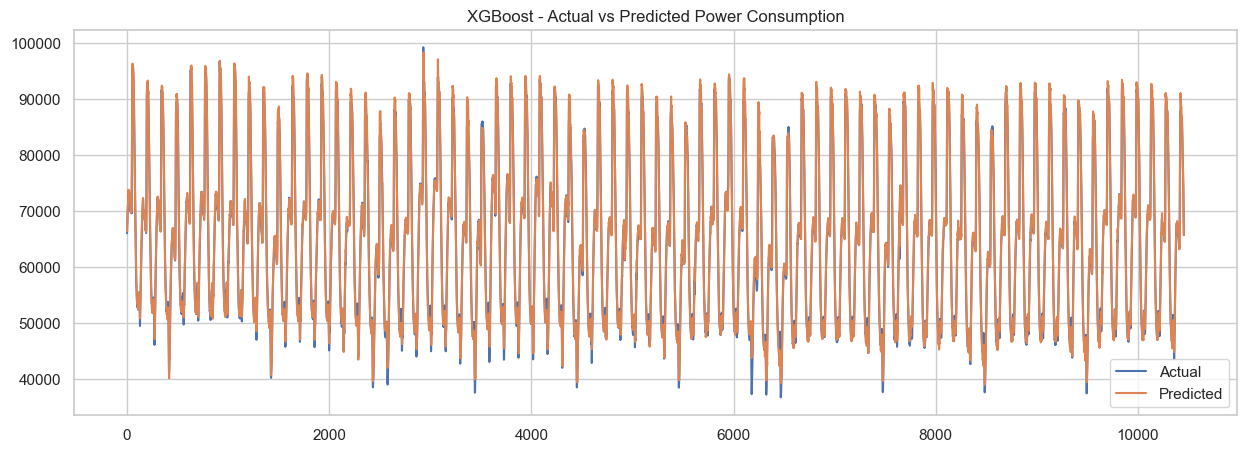

In [10]:
plt.figure(figsize=(15, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("XGBoost - Actual vs Predicted Power Consumption")
plt.legend()
plt.show()